In [ ]:
import pandas as pd
housing = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/housing_boston.csv')

In [ ]:
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])

X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (489, 3)
Shape of y: (489,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg = reg.fit(X_train, y_train) 
y_pred = reg.predict(X_test)

Untuk model regression, kita menghitung selisih antara nilai aktual (y_test) dan nilai prediksi (y_pred) yang disebut error, adapun beberapa metric yang umum digunakan, yakni 1.) Mean Squared Error (MSE) atau rata-rata dari squared error, 2.) Root Mean Squared Error (RMSE) atau akar kuadrat dari MSE, dan 3.) Mean Absolute Error (MAE) atau rata-rata dari nilai absolut error.



Mean Squared Error of testing set: 0.010913024655841009
Mean Absolute Error of testing set: 0.0778989610312069
Root Mean Squared Error of testing set: 0.1044654232549747


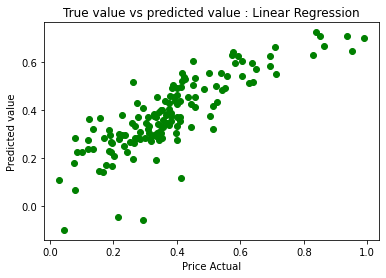

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  
import numpy as np
import matplotlib.pyplot as plt 

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error of testing set:', mse)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error of testing set:', mae)
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()

Dalam unsupervised learning, secara prosedur, tahap eksplorasi data untuk memahami karakteristik data, dan tahap preprocessing tetap dilakukan. Tetapi kita tidak membagi dataset ke feature dan label; dan juga ke dalam training dan test dataset, karena pada dasarnya kita tidak memiliki informasi mengenai label/target data.

K-Means merupakan tipe clustering dengan centroid based (titik pusat). Artinya kesamaan dari objek/sampel dihitung dari seberapa dekat objek itu dengan centroid atau titik pusat. Untuk menghitung kedekatan, digunakan perhitungan jarak antar 2 buah data atau jarak Minkowski. 

Terdapat beberapa tipe perhitungan jarak yang dapat digunakan, yaitu
Jarak Manhattan di mana g = 1,
Jarak Euclidean di mana g = 2,
Jarak Chebychev di mana g = ∞.

Untuk menentukan centroid, pada awalnya kita perlu mendefinisikan jumlah centroid (K) yang diinginkan, semisalnya kita menetapkan jumlah K = 3; maka pada awal iterasi, algorithm akan secara random menentukan 3 centroid. Setelah itu, objek/sample/data point yang lain akan dikelompokkan sebagai anggota dari salah satu centroid yang terdekat, sehingga terbentuk 3 cluster data. Iterasi selanjutnya, titik-titik centroid diupdate atau berpindah ke titik yang lain, dan jarak dari data point yang lain ke centroid yang baru dihitung kembali, kemudian dikelompokkan kembali berdasarkan jarak terdekat ke centroid yang baru. Iterasi akan terus berlanjut hingga diperoleh cluster dengan error terkecil, dan posisi centroid tidak lagi berubah. 



In [ ]:
import pandas as pd  
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/mall_customers.csv') 
X = dataset[['annual_income','spending_score']]  
cluster_model = KMeans(n_clusters = 5, random_state = 24)  
labels = cluster_model.fit_predict(X)

In [ ]:
import matplotlib.pyplot as plt

X = X.values
xs = X[:,0]
ys = X[:,1]
plt.scatter(xs,ys,c=labels, alpha=0.5)
centroids = cluster_model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x,centroids_y,marker='D', s=50)
plt.title('KMeans Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

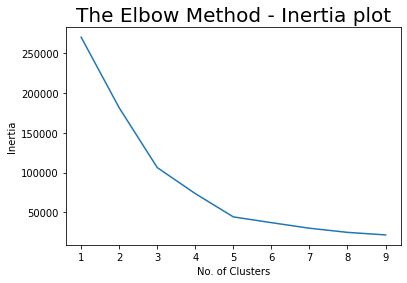

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 10):
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    cluster_model.fit(X)
    inertia_value = cluster_model.inertia_
    inertia.append(inertia_value)
    
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()